In [ ]:
import pandas as pd

housing = pd.read_csv("data.csv")

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

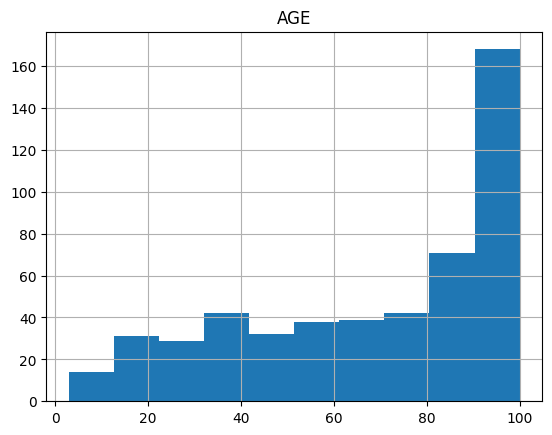

In [ ]:
housing.hist(column = "AGE")

In [ ]:
# Alternate in detail, for Learning:
import numpy as np
# def train_test_split(data, test_ratio):
#   np.random.seed(42)
#   shuffled = np.random.permutation(len(data))  #Data is shuffled so that testing model is not compromised, i.e. testing data cannot know about training data so its set to random.
  # using shuffling for our data is disadvantageous in the long run as our testing data will eventually mix up with training data after several iterations, which may lead to overfitting
  # np.random.seed helps us to keep the shuffled data fixed within test and train individually
  # test_set_size = int(len(data)*test_ratio)
  # test_indices =  shuffled[:test_set_size]    # testing indices are shuffled from start till test set size(20%)
  # train_indices =  shuffled[test_set_size:]   # training indices shuffled for remaining data, from testing set size till end of length of data
  # return data.iloc[train_indices], data.iloc[test_indices]


In [ ]:
# train_set, test_set = train_test_split(housing, 0.2)
# print(len(train_set), "****", len(test_set))

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state = 42)
print(len(train_set), "****", len(test_set))

404 **** 102


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  # Stratified sampling is very important feature used to split data into test and train data equally.
  #For example in above code line we split feature 'CHAS' so that its values(0s and 1s) are split in equal ratios and uniformally in test and train data
  #- set so that our data set is fit into our model perfectly. We do stratified splitting of 'CHAS' or any other attribute depending on their importance
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set['CHAS'].value_counts()
# strat_train_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
housing = strat_test_set

### Looking for Correlations

(Not necessary for real world ML projects)

In [ ]:
corr_matrix = housing.corr()
corr_matrix['CRIM'].sort_values(ascending = False)


CRIM       1.000000
RAD        0.573310
TAX        0.534409
LSTAT      0.422718
NOX        0.406703
INDUS      0.389608
AGE        0.334546
PTRATIO    0.248474
B         -0.001447
CHAS      -0.039831
RM        -0.100907
ZN        -0.170482
DIS       -0.367583
MEDV      -0.388768
Name: CRIM, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='CRIM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='CRIM'>,
        <Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='CRIM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>]], dtype=object)

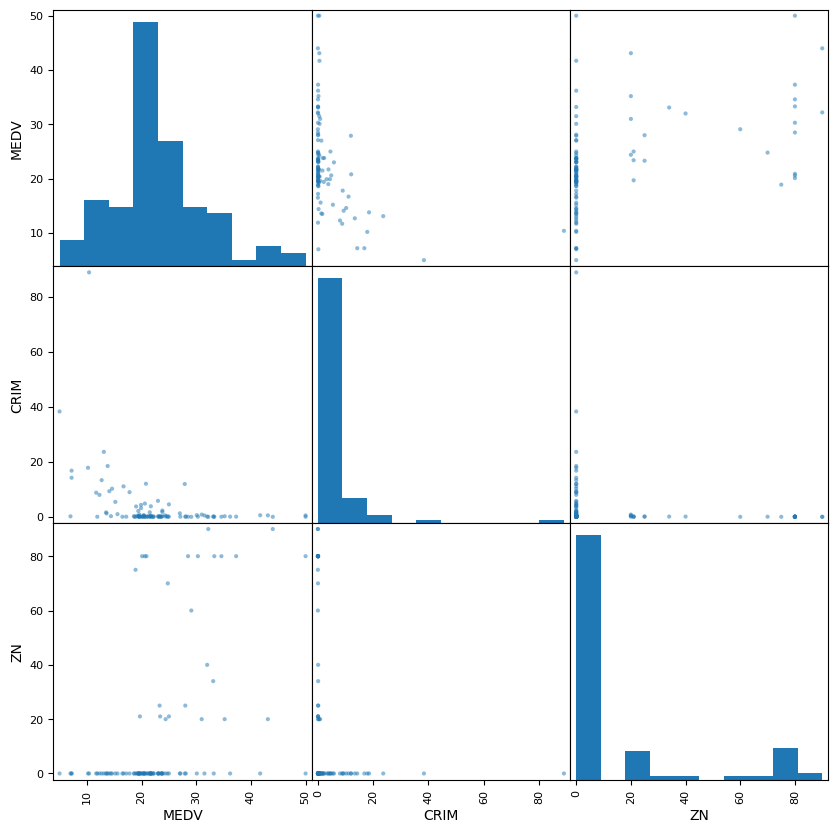

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'CRIM', 'ZN']
scatter_matrix(housing[attributes], figsize = (10,10))

<Axes: xlabel='RM', ylabel='MEDV'>

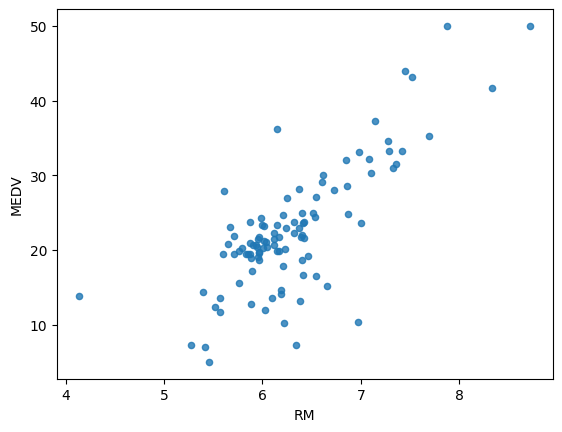

In [ ]:
housing.plot(kind = "scatter", x='RM', y="MEDV", alpha = 0.8)


### **Attribute Combinations**

In [ ]:
# housing['TAXRM'] = housing['TAX']/housing["RM"]

In [ ]:
# housing['TAXRM']

In [ ]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_label = strat_train_set["MEDV"].copy()

### Missing Attributes:

To handle missing attributes, we have 3 options:
1. Removing missing datapoints
2. Removing whole attribute
3. Setting missing value to 0, mean, median, etc

In [ ]:
a = housing.dropna(subset = ["RM"])   # This is Option 1
#Note that there is NO change in the original housing Data!!
a.shape

(399, 13)

In [ ]:
housing.drop("RM", axis = 1).shape

(404, 12)

In [ ]:
median = housing["RM"].median()   #This is Option 3
median

6.209

In [ ]:
housing.fillna(median)    #Note that original data remains unchanged
housing.shape

(404, 13)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy= 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_.shape

(13,)

In [ ]:
X = imputer.transform(housing)


In [ ]:
housing_tr = pd.DataFrame( X, columns = housing.columns)

In [ ]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy ='median')),
    ('std_scalar', StandardScaler())
])

In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing)

### Selecting Model for our project(Real Estate Forecasting):

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [ ]:
some_data = housing.iloc[:5]

In [ ]:
some_labels = housing_label.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

array([22.323, 25.608, 16.577, 23.473, 23.626])

In [ ]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

### Evaluating the Model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

In [ ]:
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [ ]:
lin_mse   #Zero Mean square error means that our model is overfit and has also seen all the noise in training data as well

1.5018535940594038

In [ ]:
lin_rmse

1.2255013643645623

### Using better evaluation technique - Cross Validation Setting

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_tr, housing_label, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-score)

In [ ]:
rmse_scores

array([2.95103014, 2.86343181, 4.55078665, 2.52704296, 3.44612751,
       2.63054492, 4.81688603, 3.32779417, 3.11785481, 3.15365967])

In [ ]:
def print_scores(score):
  print("Scores:", score)
  print("Mean:", score.mean())
  print("Standard Deviation:", score.std())

In [ ]:
print_scores(rmse_scores)

Scores: [2.95103014 2.86343181 4.55078665 2.52704296 3.44612751 2.63054492
 4.81688603 3.32779417 3.11785481 3.15365967]
Mean: 3.338515866804758
Standard Deviation: 0.7270005725717839


### Testing our model on test data:

In [ ]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

2.9503024986149007

In [ ]:
from joblib import dump, load
dump(model, "Real_Estate_Predictor.joblib")

['Real_Estate_Predictor.joblib']

In [ ]:
from google.colab import files
files.download("Real_Estate_Predictor.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>